Importing neccesary libraries

In [2]:
import numpy as np
import pathlib
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from PIL import Image
import tensorflow
from tensorflow import keras
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Dataset

In [4]:
train_dir = '/content/drive/MyDrive/AI/Vegetables/train'
train_dir = pathlib.Path(train_dir)
train_dir

PosixPath('/content/drive/MyDrive/AI/Vegetables/train')

In [5]:
validation_dir = '/content/drive/MyDrive/AI/Vegetables/validation'
validation_dir = pathlib.Path(validation_dir)
validation_dir

PosixPath('/content/drive/MyDrive/AI/Vegetables/validation')

In [6]:
test_dir = '/content/drive/MyDrive/AI/Vegetables/test'
test_dir = pathlib.Path(test_dir)
test_dir

PosixPath('/content/drive/MyDrive/AI/Vegetables/test')

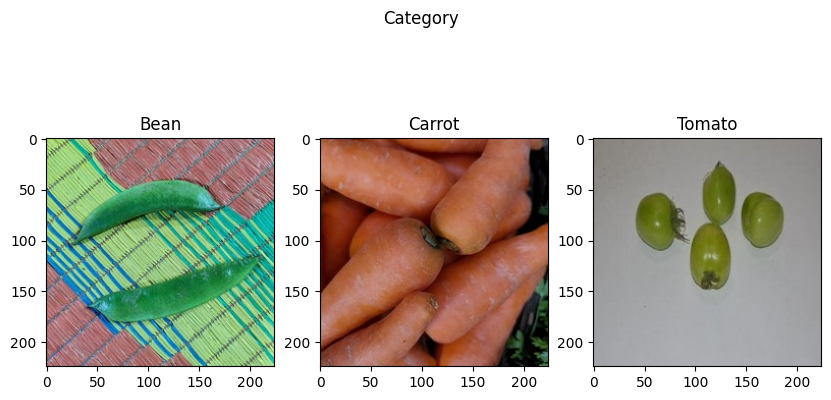

In [7]:
Bean = list(train_dir.glob('Bean/*'))
Carrot = list(train_dir.glob('Carrot/*'))
Tomato = list(train_dir.glob('Tomato/*'))


fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(10,5))
fig.suptitle('Category')

Bean_img = img.imread(Bean[0])
Carrot_img = img.imread(Carrot[0])
Tomato_img = img.imread(Tomato[0])

ax[0].set_title('Bean')
ax[1].set_title('Carrot')
ax[2].set_title('Tomato')

ax[0].imshow(Bean_img)
ax[1].imshow(Carrot_img)
ax[2].imshow(Tomato_img)

In [8]:
df_images = {
    'Bean':Bean,
    'Carrot':Carrot,
    'Tomato':Tomato
}

df_labels = {
    'Bean':0,
    'Carrot':1,
    'Tomato':2
}

In [9]:
X, y = [], []  # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = Image.open(image)
        X.append(np.array(img))
        y.append(df_labels[label])

In [10]:
print('len(X) : ',len(X))
print('len(y) : ',len(y))

len(X) :  3000
len(y) :  3000


In [11]:
# Standardize
X = np.array(X, dtype='float32') / 255.0  # Convert to float and normalize
y = np.array(y)

In [12]:
# Converting labels in y to categorical format

y_cat = to_categorical(y)

validation data

In [13]:
# Validation Data

Bean = list(validation_dir.glob('Bean/*'))
Carrot = list(validation_dir.glob('Carrot/*'))
Tomato = list(validation_dir.glob('Tomato/*'))

val_images = {
    'Bean':Bean,
    'Carrot':Carrot,
    'Tomato':Tomato
}

val_labels = {
    'Bean':0,
    'Carrot':1,
    'Tomato':2
}

X_val, y_val = [], []  # X = images, y = labels
for label, images in val_images.items():
    for image in images:
        img = Image.open(image)
        X_val.append(np.array(img))
        y_val.append(val_labels[label])


# Standardize
X_val = np.array(X_val, dtype='float32') / 255.0  # Convert to float and normalize
y_val = np.array(y_val)

print(X_val.shape)
print(y_val.shape)

y_val = to_categorical(y_val)

print(X_val.shape)
print(y_val.shape)

(600, 224, 224, 3)
(600,)
(600, 224, 224, 3)
(600, 3)


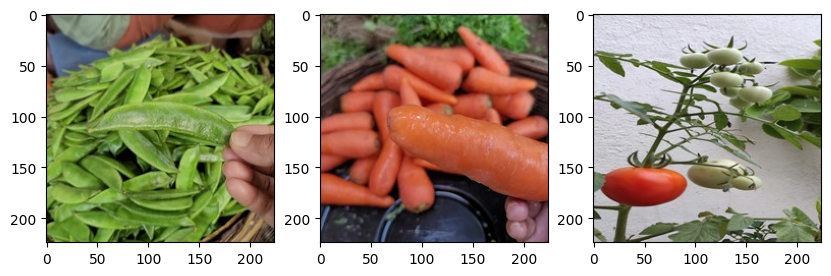

In [14]:
fig, ax = plt.subplots(ncols= 3, nrows = 1, figsize=(10,5))

ax[0].imshow(X_val[0])
ax[1].imshow(X_val[205])
ax[2].imshow(X_val[500])

Building the Model

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(5,5),input_shape=(224,224,3),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

Training

In [16]:
hist = model.fit(X,y_cat,epochs=2,validation_data=(X_val,y_val))

Epoch 1/2
94/94 [==============================] - 1146s 12s/step - loss: 0.7830 - accuracy: 0.5893 - val_loss: 0.3965 - val_accuracy: 0.8333
Epoch 2/2
94/94 [==============================] - 1133s 12s/step - loss: 0.3171 - accuracy: 0.8857 - val_loss: 0.4219 - val_accuracy: 0.8000


In [18]:
model.evaluate(X_val,y_val)

19/19 [==============================] - 55s 3s/step - loss: 0.4219 - accuracy: 0.8000


[0.42193859815597534, 0.800000011920929]

Preprocessing Test data

In [19]:
# Test Data

Bean = list(test_dir.glob('Bean/*'))
Carrot = list(test_dir.glob('Carrot/*'))
Tomato = list(validation_dir.glob('Tomato/*'))

test_images = {
    'Bean':Bean,
    'Carrot':Carrot,
    'Tomato':Tomato
}

test_labels = {
    'Bean':0,
    'Carrot':1,
    'Tomato':2
}

X_test, y_test = [], []  # X = images, y = labels
for label, images in test_images.items():
    for image in images:
        img = Image.open(image)
        X_test.append(np.array(img))
        y_test.append(test_labels[label])


# Standardize
X_test = np.array(X_test, dtype='float32') / 255.0
y_test = np.array(y_test)

print(X_test.shape)
print(y_test.shape)

y_test = to_categorical(y_test)

print(X_test.shape)
print(y_test.shape)

(600, 224, 224, 3)
(600,)
(600, 224, 224, 3)
(600, 3)


In [20]:
#Evaluate

model.evaluate(X_test,y_test)

19/19 [==============================] - 54s 3s/step - loss: 0.4653 - accuracy: 0.7650


[0.4653010666370392, 0.7649999856948853]

Testing the model with user inputs

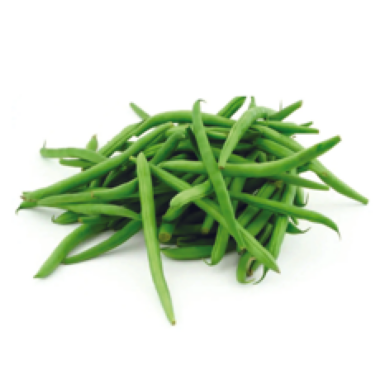

In [21]:
img_path = '/content/Bean.jpg'
img = Image.open(img_path)

img = img.resize((224, 224))  # Resize the image to (224, 224)

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [23]:
# Convert the image to a numpy array
img_array = np.array(img)

# Display the shape of the image array
print("Image Shape:", img_array.shape)

# Convert the image to a numpy array and normalize it
img_array = np.array(img) / 255.0

# Display the shape of the normalized image array
print("Image Shape (normalized):", img_array.shape)

predictions = model.predict(np.expand_dims(img_array, axis=0))
print(predictions)

# Get the index of the maximum value
predicted_index = np.argmax(predictions)

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Bean'
elif predicted_index == 1:
    predicted_class = 'Carrot'
elif predicted_index == 2:
    Predicted_class = 'Tomato'
else:
    predicted_class = 'Unknown'

print("Predicted Class:", predicted_class)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 1s 674ms/step
[[9.9316287e-01 1.1875802e-10 6.8371724e-03]]
Predicted Class: Bean


2nd Sample

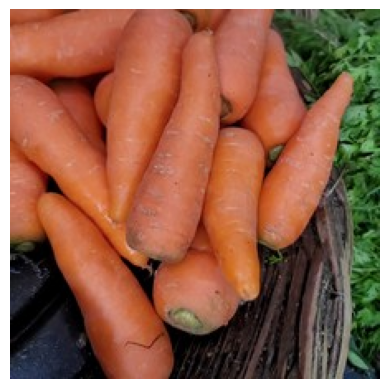

In [34]:
# Load the image
img_path = '/content/Carrot.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))  # Resize
plt.imshow(img) # Display
plt.axis('off')
plt.show()

In [35]:
img_array = np.array(img)
print("Image Shape:", img_array.shape)

img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

predictions = model.predict(np.expand_dims(img_array, axis=0))
print(predictions)

predicted_index = np.argmax(predictions)

# Map the index to the corresponding class
if predicted_index == 0:
    predicted_class = 'Bean'
elif predicted_index == 1:
    predicted_class = 'Carrot'
else:
    predicted_class = 'Tomato'

print("Predicted Class:", predicted_class)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)
1/1 [==============================] - 0s 129ms/step
[[9.1143818e-05 8.6529344e-01 1.3461535e-01]]
Predicted Class: Carrot


In [36]:
predictions = model.predict(np.expand_dims(img_array, axis=0))
print(predictions)

1/1 [==============================] - 0s 189ms/step
[[9.1143818e-05 8.6529344e-01 1.3461535e-01]]


Sample 3

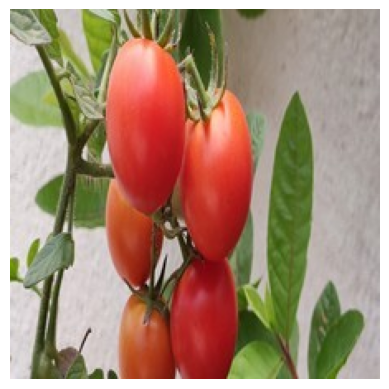

In [47]:
img_path = '/content/Tomato.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
plt.imshow(img)   # Display
plt.axis('off')
plt.show()

In [48]:
# Convert the image to a numpy array
img_array = np.array(img)
print("Image Shape:", img_array.shape)
img_array = np.array(img) / 255.0
print("Image Shape (normalized):", img_array.shape)

Image Shape: (224, 224, 3)
Image Shape (normalized): (224, 224, 3)


In [49]:

predicted_index = np.argmax(predictions)

if predicted_index == 0:
    predicted_class = 'Bean'
elif predicted_index == 1:
    predicted_class = 'Tomato'
else:
    predicted_class = 'Carrot'

print("Predicted Class:", predicted_class)

Predicted Class: Tomato
